# Вариант №2.

In [1]:
variant = 2

Если что, ячейки можно скрывать по разделам `Markdown`.

# Импорты и определения

### Библиотеки и их настройка

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math as m
import string
from IPython.display import display, Math, Markdown  # для вывода формул в консоль

In [3]:
def mprint(*strings):  # функция вывода маркдаун в консоль
    for s in strings:
        display(Markdown(s))


def dataframe_to_markdown(df):
    markdown_table = "| Index | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2)) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table


# можно выводить latex в надписях matplotlib
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

### Парсинг вариантов

In [4]:
%pwd

'/Users/retrobanner/Projects/mephi_stats/bdz/var_2'

In [5]:
# считываем столбики для варианта
datas = pd.read_excel("../bdz_vars.xls", index_col=0).loc[variant]

datas.head()

1.1         B7 B8 B9
1.2               B7
2.1, 3.1          B7
2.2, 3.2          B7
2.3, 3.3     B11 B12
Name: 2, dtype: object

In [6]:
# создаём словарик: задание -> список столбцов
variant_dict = dict()
for tasks in datas.index:
    for task in tasks.split(", "):
        variant_dict[task] = datas[tasks].split(" ")

print(variant_dict)

{'1.1': ['B7', 'B8', 'B9'], '1.2': ['B7'], '2.1': ['B7'], '3.1': ['B7'], '2.2': ['B7'], '3.2': ['B7'], '2.3': ['B11', 'B12'], '3.3': ['B11', 'B12'], '2.4': ['B11', 'B12'], '3.4': ['B11', 'B12'], '4': ['B7'], '5': ['B11', 'B12'], '6': ['B3', 'B5'], '7': ['B6', 'B1'], '8.1': ['B11', 'B12'], '8.2': ['B7', 'B8', 'B9'], '9.1': ['B1', 'B2'], '9.2': ['B1', 'B2'], '9.3': ['B1', 'B4', 'B2']}


### Считываем информацию из excel

In [7]:
dfs = pd.read_excel("../bdz_data.xls", sheet_name=None)
dfs.keys()

dict_keys(['description', 'A - aaup', 'B - bodyfat', 'C - plasma', 'D - homedat'])

In [8]:
# создаём словарик: буква -> название листа в excel
sheet_dict = dict()
for value in list(dfs.keys())[1:]:
    key = value[0]
    sheet_dict[key] = value
print(sheet_dict)

{'A': 'A - aaup', 'B': 'B - bodyfat', 'C': 'C - plasma', 'D': 'D - homedat'}


In [9]:
# функция: задание -> необходимые данные
def data(task):
    X = []
    for data in variant_dict[task]:
        sheet = data[0]
        column = data
        df = dfs[sheet_dict[sheet]][column]
        X.append(df)
    return X

# Раздел 1. Описательные статистики

## 1.1 Выборочные характеристики

### Условие

Анализируемый признак 1 – `B7` (Weight (lbs))

Анализируемый признак 2 – `B8` (Height (inches))

Анализируемый признак 3 – `B9` (Neck circumference (cm))

### Определения

In [10]:
columns = data("1.1")
for i in columns:
    print(i.head())

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64
0    67.75
1    72.25
2    66.25
3    72.25
4    71.25
Name: B8, dtype: float64
0    36.2
1    38.5
2    34.0
3    37.4
4    34.4
Name: B9, dtype: float64


### Формулы

| Выборочная характеристика                | Формула расчёта                                                                                                                                                                                                                                 |
| ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Объём выборки                            | $n$                                                                                                                                                                                                                                             |
| Среднее                                  | $\overline x = \dfrac{1}{n} \sum\limits_{i = 1}^{n} x_i$                                                                                                                                                                                        |
| Выборочная дисперсия                     | $D_X^* = \dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2$                                                                                                                                                                 |
| Выборочное среднеквадратичное отклонение | $\sigma_X^* = \sqrt{D_X^*} =\sqrt{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2}$                                                                                                                                       |
| Выборочный коэффициент асимметрии        | $\gamma_X^* = \dfrac{\mu_{3,X}^*}{\left(\sigma_X^*\right)^3} = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^3}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^{\frac{3}{2}}}$ |
| Выборочный эксцесс                       |      $\varepsilon_X^* = \dfrac{\mu_{4,X}^*}{\left(\sigma_X^*\right)^4} = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^4}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^2}$                                                                                                                                                                                                                                           |


### Рассчёты

`pd.skew()` возвращает несмещенный выборочный коэффициент асимметрии, поэтому лучше использовать `stats.skew(bias=True)`, чтобы его получить.

То же самое касается функции `kurtosis()`.

In [11]:
for i, X in enumerate(columns, start=1):
    mean_ = X.mean()
    D = X.var(ddof=0)
    d = X.std(ddof=0)
    g = stats.skew(X, bias=True)
    e = stats.kurtosis(X, bias=True)
    output = f"$\\mathbf{{X_{i}}}:$ \
        $\\overline x_{i} =$ {mean_:.2f}; \
        $D^*_{{X_{i}}} =$ {D:.2f}; \
        $\\sigma^*_{{X_{i}}} =$ {d:.2f}; \
        $\\gamma^*_{{X_{i}}} =$ {g:.2f}; \
        $\\varepsilon^*_{{X_{i}}} =$ {e:.2f} \
        "
    mprint(output)

$\mathbf{X_1}:$         $\overline x_1 =$ 178.92;         $D^*_{X_1} =$ 860.30;         $\sigma^*_{X_1} =$ 29.33;         $\gamma^*_{X_1} =$ 1.20;         $\varepsilon^*_{X_1} =$ 5.14         

$\mathbf{X_2}:$         $\overline x_2 =$ 70.15;         $D^*_{X_2} =$ 13.36;         $\sigma^*_{X_2} =$ 3.66;         $\gamma^*_{X_2} =$ -5.35;         $\varepsilon^*_{X_2} =$ 58.35         

$\mathbf{X_3}:$         $\overline x_3 =$ 37.99;         $D^*_{X_3} =$ 5.89;         $\sigma^*_{X_3} =$ 2.43;         $\gamma^*_{X_3} =$ 0.55;         $\varepsilon^*_{X_3} =$ 2.64         

| Выборочная характеристика                | Признак 1 | Признак 2 | Признак 3 |
| ---------------------------------------- | --------- | --------- | --------- |
| Среднее                                  | 178.92    | 70.15     | 37.99     |
| Выборочная дисперсия                     | 860.30    | 13.36     | 5.89      |
| Выборочное среднеквадратичное отклонение | 29.33     | 3.66      | 2.43      |
| Выборочный коэффициент асимметрии        | 1.20      | -5.35     | 0.55      |
| Выборочный эксцесс                       | 5.14      | 58.35     | 2.64      |


## 1.2 Группировка и гистограммы частот

### Условие

Анализируемый признак – `B7` (Weight (lbs))

Объём выборки – `252`

### Определения

In [12]:
columns = data("1.2")
print(len(columns))
X = columns[0].to_frame()
X.columns = ["value"]
X.head()

1


,value
0,154.25
1,173.25
2,154.00
3,184.75
4,184.25


### Выбрать число групп

In [13]:
n = len(X["value"])
maximum = max(X["value"])
minimum = min(X["value"])
k = round(1 + 1.3 * m.log(n))
mprint(f"$\\mathbf{{X}}: \\max = {maximum}, \\min = {minimum}, n = {n}, k = {k}$")

$\mathbf{X}: \max = 363.15, \min = 118.5, n = 252, k = 8$

In [14]:
X["group"] = pd.cut(X["value"], bins=k)
X.head()

,value,group
0,154.25,"(149.081, 179.662]"
1,173.25,"(149.081, 179.662]"
2,154.00,"(149.081, 179.662]"
3,184.75,"(179.662, 210.244]"
4,184.25,"(179.662, 210.244]"


In [15]:
group_len = np.mean(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
mprint(f"$\\overline{{\\mid\\Delta_k\\mid}} =$ {group_len}")

$\overline{\mid\Delta_k\mid} =$ 30.611874999999998

| Число групп | Обоснование выбора числа групп               | Ширина интервалов |
| ----------- | -------------------------------------------- | ----------------- |
| 8           | Формула Стерджесса: $k \approx 1 + 1,3 \ln{n}$ |     30.61             |


### Построить таблицу частот

In [16]:
groups = pd.DataFrame(index=range(1, k + 1))
groups["low edge"] = [interval.left for interval in X["group"].cat.categories]
groups["high edge"] = [interval.right for interval in X["group"].cat.categories]
groups["frequency"] = X["group"].value_counts().sort_index().values
groups["relative frequency"] = groups["frequency"] / n
groups["cumulative frequency"] = groups["frequency"].cumsum()
groups["cumulative relative frequency"] = groups["cumulative frequency"] / n
groups

,low edge,high edge,frequency,relative frequency,cumulative frequency,cumulative relative frequency
1,118.255,149.081,31,0.123016,31,0.123016
2,149.081,179.662,110,0.436508,141,0.559524
3,179.662,210.244,76,0.301587,217,0.861111
4,210.244,240.825,29,0.115079,246,0.976190
5,240.825,271.406,5,0.019841,251,0.996032
6,271.406,301.987,0,0.000000,251,0.996032
7,301.987,332.569,0,0.000000,251,0.996032
8,332.569,363.150,1,0.003968,252,1.000000


In [17]:
# Чтобы быстрее заполнить табличку
print(dataframe_to_markdown(groups))

| Index | low edge | high edge | frequency | relative frequency | cumulative frequency | cumulative relative frequency |
|---|---|---|---|---|---|---|
| 1 | 118.25 | 149.08 | 31.0 | 0.12 | 31.0 | 0.12 |
| 2 | 149.08 | 179.66 | 110.0 | 0.44 | 141.0 | 0.56 |
| 3 | 179.66 | 210.24 | 76.0 | 0.3 | 217.0 | 0.86 |
| 4 | 210.24 | 240.82 | 29.0 | 0.12 | 246.0 | 0.98 |
| 5 | 240.82 | 271.41 | 5.0 | 0.02 | 251.0 | 1.0 |
| 6 | 271.41 | 301.99 | 0.0 | 0.0 | 251.0 | 1.0 |
| 7 | 301.99 | 332.57 | 0.0 | 0.0 | 251.0 | 1.0 |
| 8 | 332.57 | 363.15 | 1.0 | 0.0 | 252.0 | 1.0 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота | Относительная частота | Накопленная частота | Относительная накопленная частота |
| --------------- | -------------- | --------------- | ------- | --------------------- | ------------------- | --------------------------------- |
| 1               | 118.25         | 149.08          | 31      | 0.12                  | 31                  | 0.12                              |
| 2               | 149.08         | 179.66          | 110     | 0.44                  | 141                 | 0.56                              |
| 3               | 179.66         | 210.24          | 76      | 0.3                   | 217                 | 0.86                              |
| 4               | 210.24         | 240.82          | 29      | 0.12                  | 246                 | 0.98                              |
| 5               | 240.82         | 271.41          | 5       | 0.02                  | 251                 | 1.00                              |
| 6               | 271.41         | 301.99          | 0       | 0.0                   | 251                 | 1.00                              |
| 7               | 301.99         | 332.57          | 0       | 0.0                   | 251                 | 1.00                              |
| 8               | 332.57         | 363.15          | 1       | 0.0                   | 252                 | 1.00                              |

### Построить гистограммы частот и полигоны частот

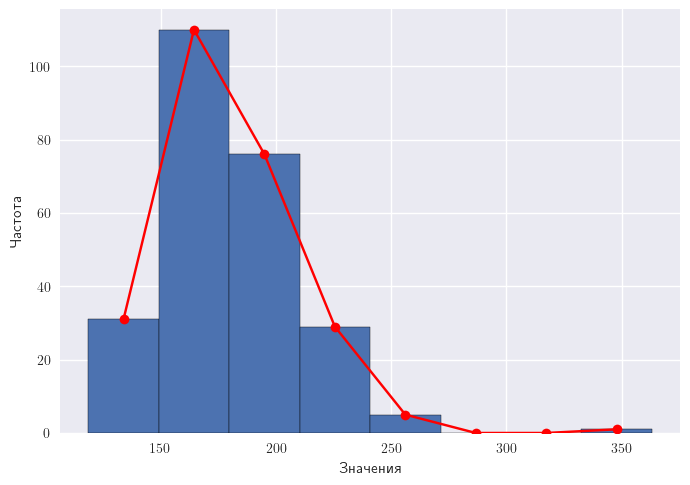

In [18]:
frequences, bins, _ = plt.hist(X["value"], bins=k, edgecolor="black")

bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, frequences, marker="o", color="r")

plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

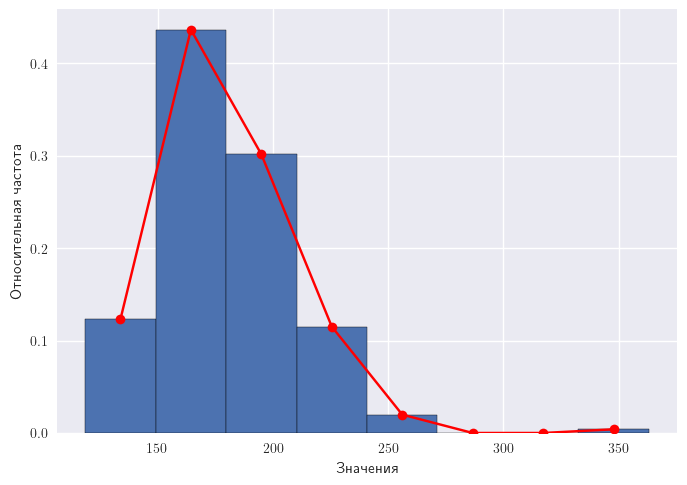

In [19]:
plt.bar(
    bin_centers,
    groups["relative frequency"],
    width=np.diff(bins),
    edgecolor="black",
)
plt.plot(bin_centers, groups["relative frequency"], marker="o", color="r")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")
plt.show()

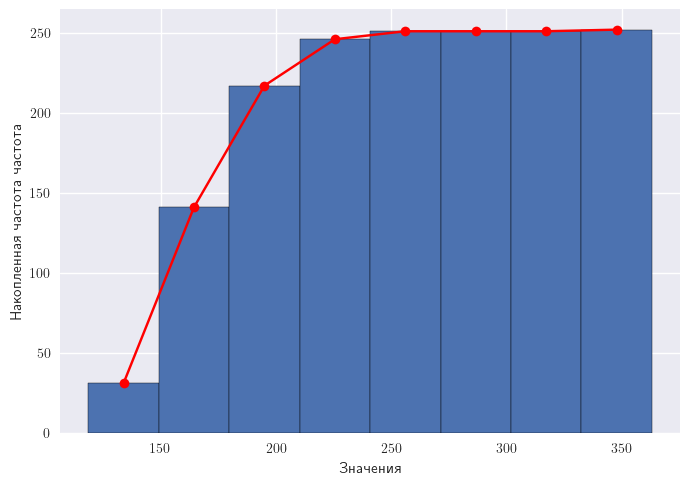

In [20]:
plt.bar(
    bin_centers,
    groups["cumulative frequency"],
    width=np.diff(bins),
    edgecolor="black",
)
plt.plot(bin_centers, groups["cumulative frequency"], marker="o", color="r")
plt.xlabel("Значения")
plt.ylabel("Накопленная частота частота")
plt.show()

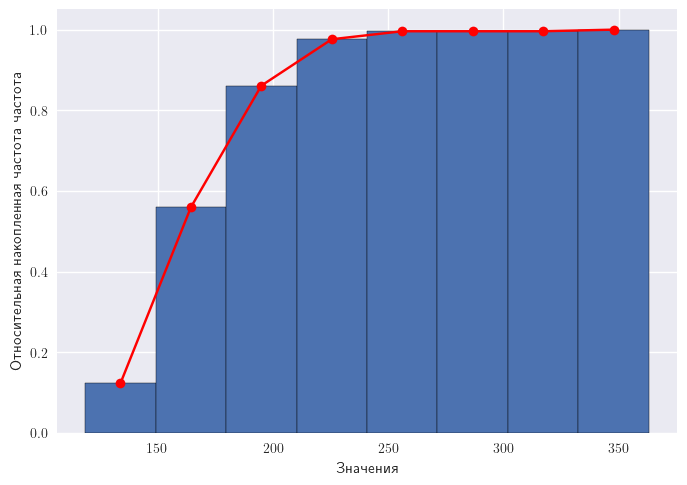

In [21]:
plt.bar(
    bin_centers,
    groups["cumulative relative frequency"],
    width=np.diff(bins),
    edgecolor="black",
)
plt.plot(bin_centers, groups["cumulative relative frequency"], marker="o", color="r")
plt.xlabel("Значения")
plt.ylabel("Относительная накопленная частота частота")
plt.show()

### Построить эмпирическую фукнцию распределения

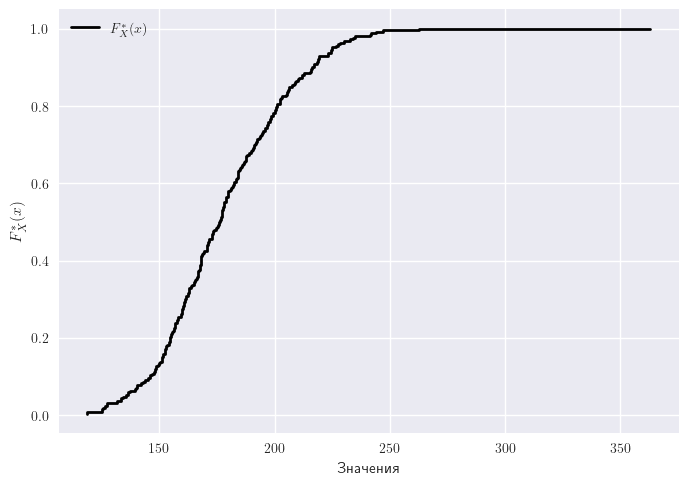

In [30]:
y = np.arange(1, n + 1) / n

plt.step(X["value"].sort_values(), y, label=r"$F_X^*(x)$", linewidth=2, color="black")
plt.xlabel("Значения")
plt.ylabel("$F^*_X(x)$")
plt.legend()
plt.show()